In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('Students Social Media Addiction.csv')

In [14]:
df

,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7
...,...,...,...,...,...,...,...,...,...,...,...,...
700,20,Female,Undergraduate,Italy,4.7,TikTok,No,7.2,7,In Relationship,2,5
701,23,Male,Graduate,Russia,6.8,Instagram,Yes,5.9,4,Single,5,9
702,21,Female,Undergraduate,China,5.6,WeChat,Yes,6.7,6,In Relationship,3,7
703,24,Male,Graduate,Japan,4.3,Twitter,No,7.5,8,Single,2,4


In [7]:
df.drop(['Student_ID'],axis=1,inplace=True)

In [13]:
columns = df.columns
for column in columns:
    print(f"column:\n{df[column].value_counts()}")
    print(f"is_null:{df[column].isnull().sum()}\n")

column:
Age
20    165
19    163
21    156
22    147
23     34
24     26
18     14
Name: count, dtype: int64
is_null:0

column:
Gender
Female    353
Male      352
Name: count, dtype: int64
is_null:0

column:
Academic_Level
Undergraduate    353
Graduate         325
High School       27
Name: count, dtype: int64
is_null:0

column:
Country
India        53
USA          40
Canada       34
Denmark      27
Ireland      27
             ..
Uruguay       1
Ecuador       1
Venezuela     1
Peru          1
Jamaica       1
Name: count, Length: 110, dtype: int64
is_null:0

column:
Avg_Daily_Usage_Hours
4.7    31
4.5    30
4.8    29
4.6    28
4.4    27
       ..
7.7     1
7.6     1
1.5     1
2.1     1
8.5     1
Name: count, Length: 67, dtype: int64
is_null:0

column:
Most_Used_Platform
Instagram    249
TikTok       154
Facebook     123
WhatsApp      54
Twitter       30
LinkedIn      21
WeChat        15
Snapchat      13
LINE          12
KakaoTalk     12
VKontakte     12
YouTube       10
Name: count, dty

In [15]:
df.columns

Index(['Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours',
       'Most_Used_Platform', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

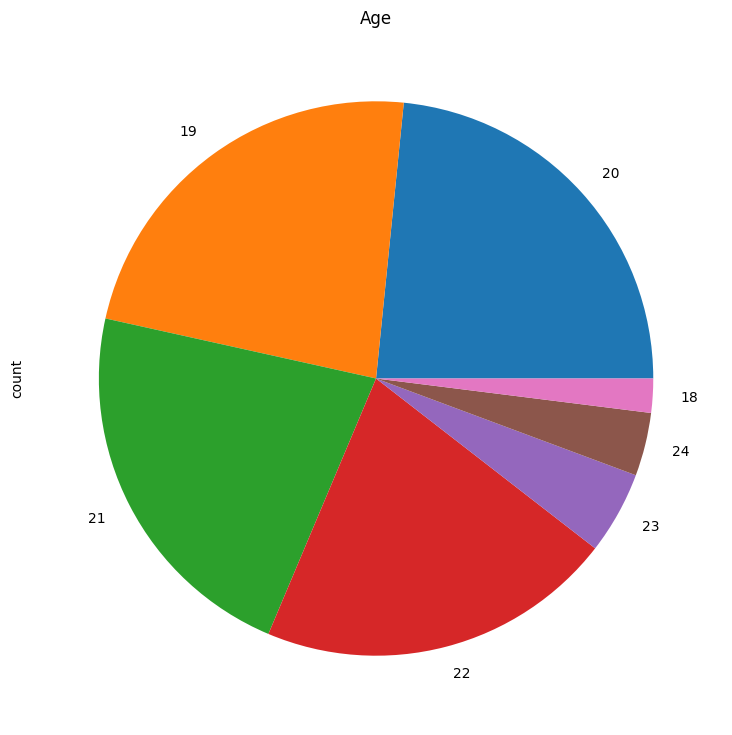

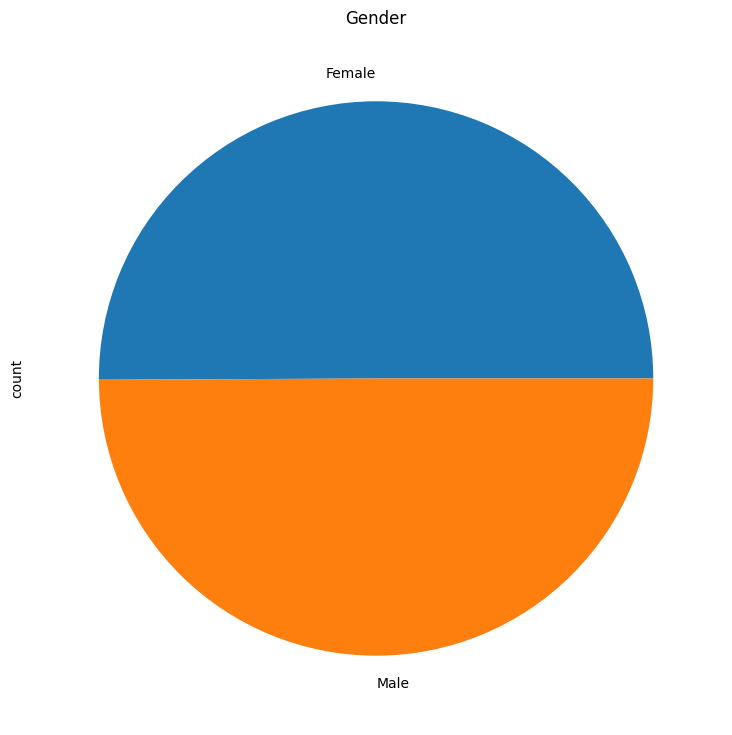

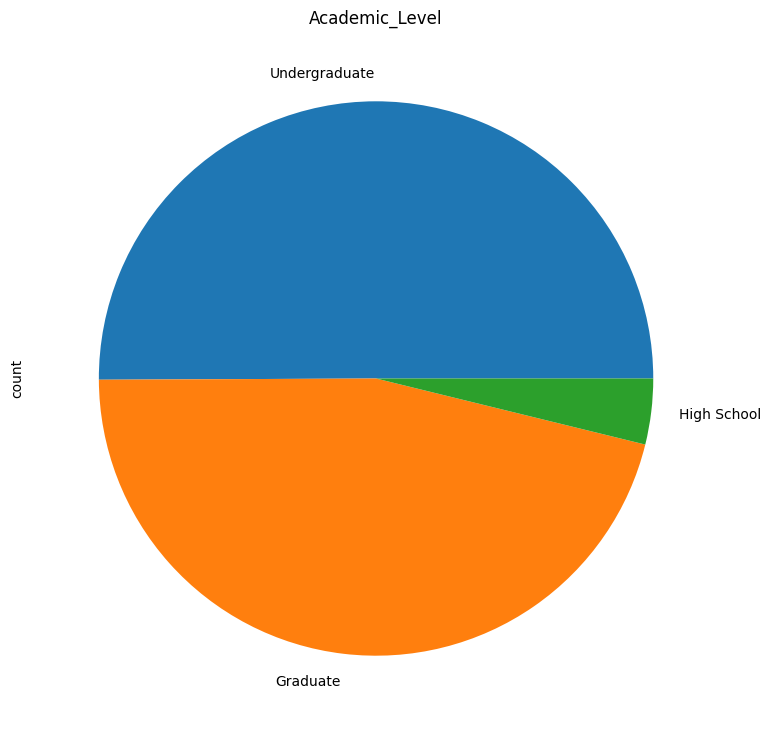

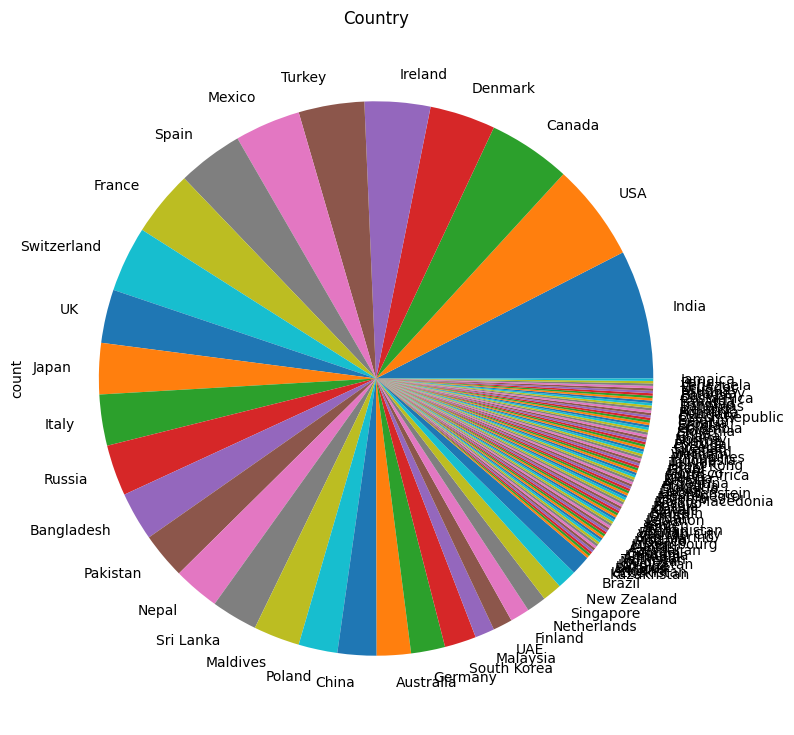

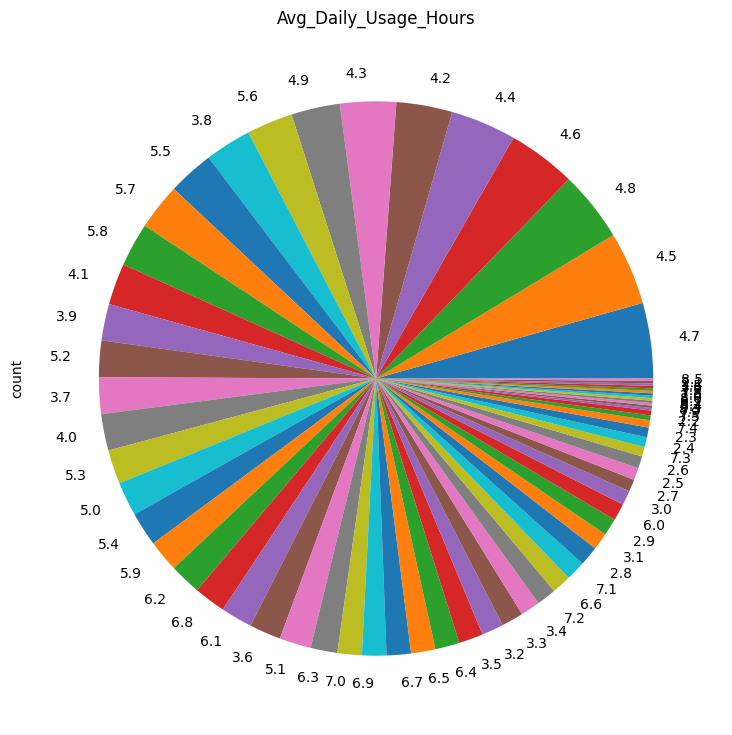

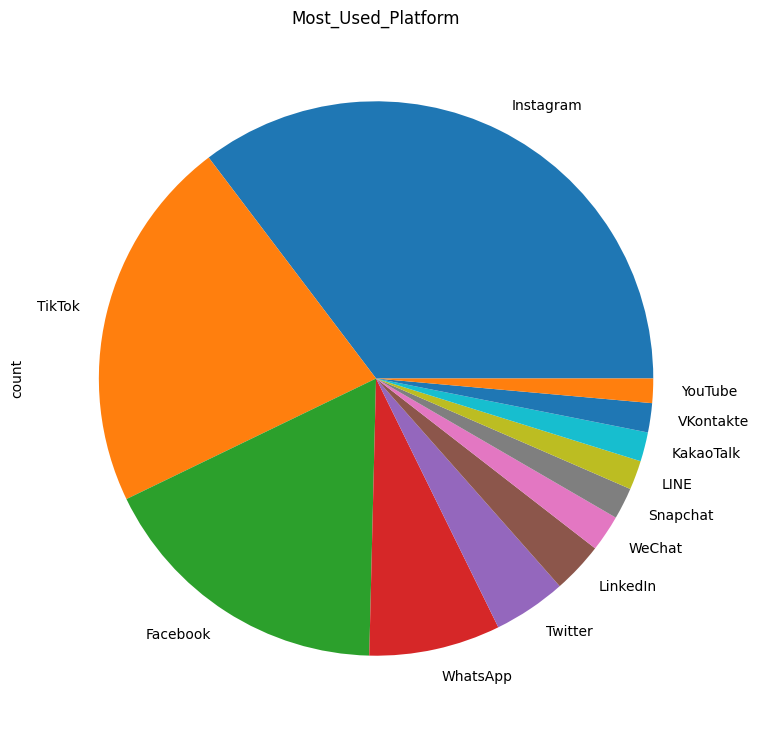

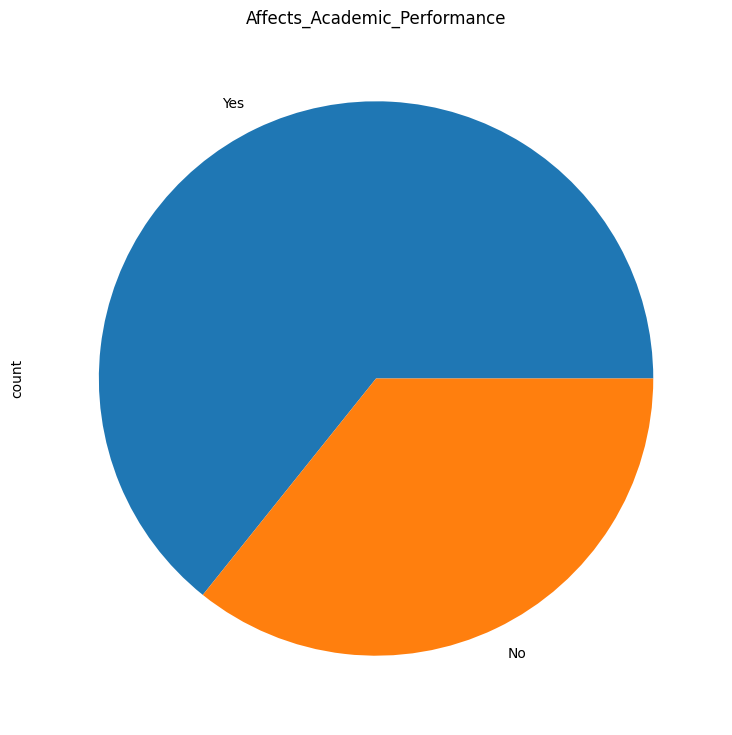

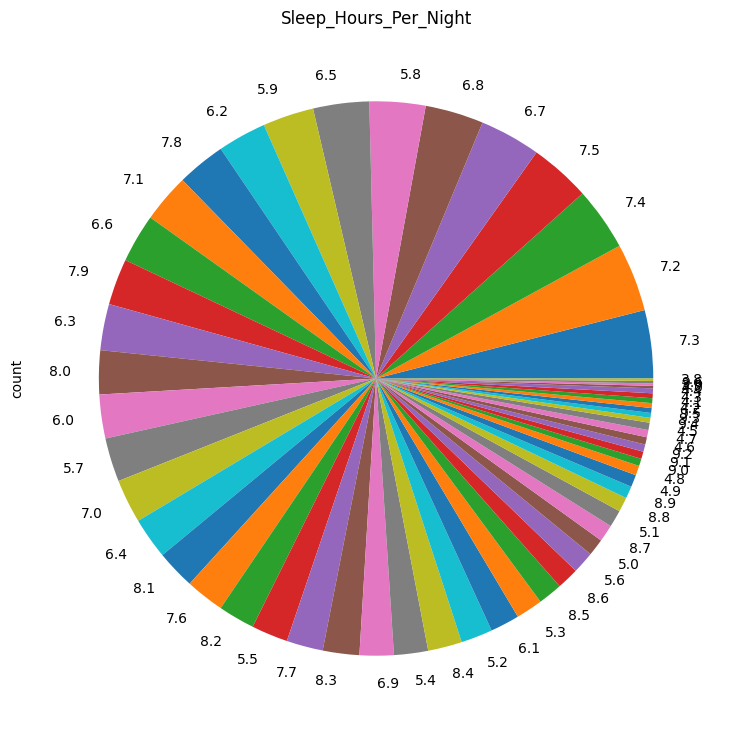

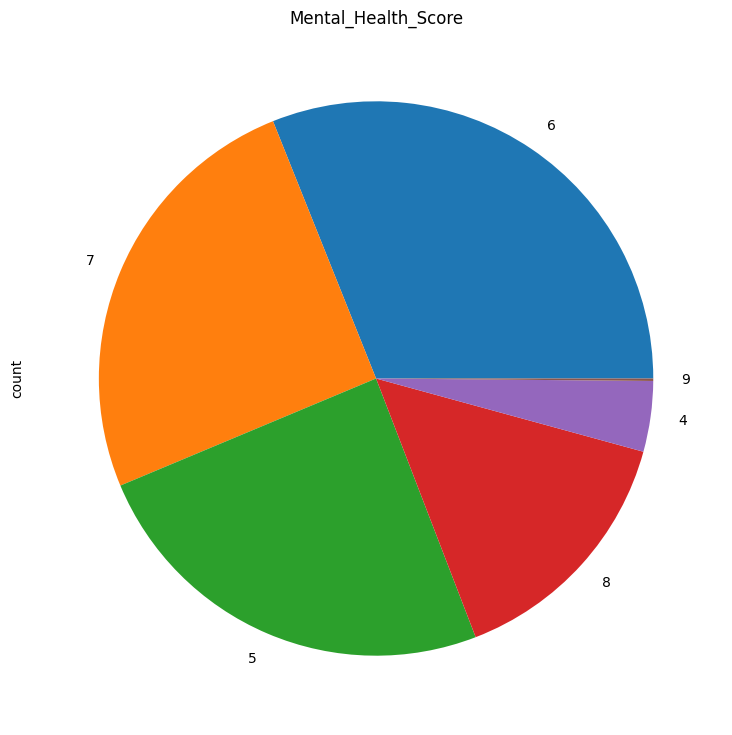

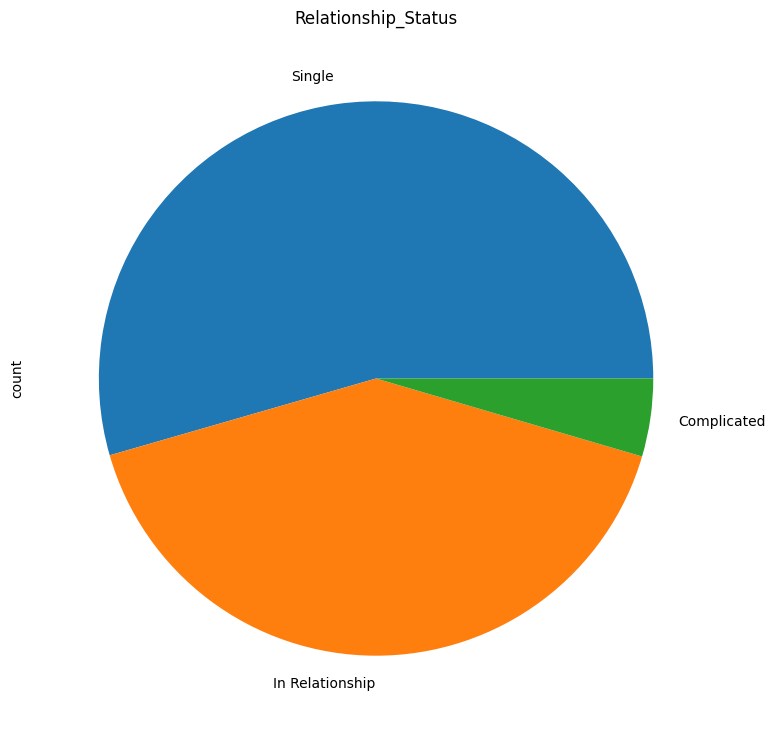

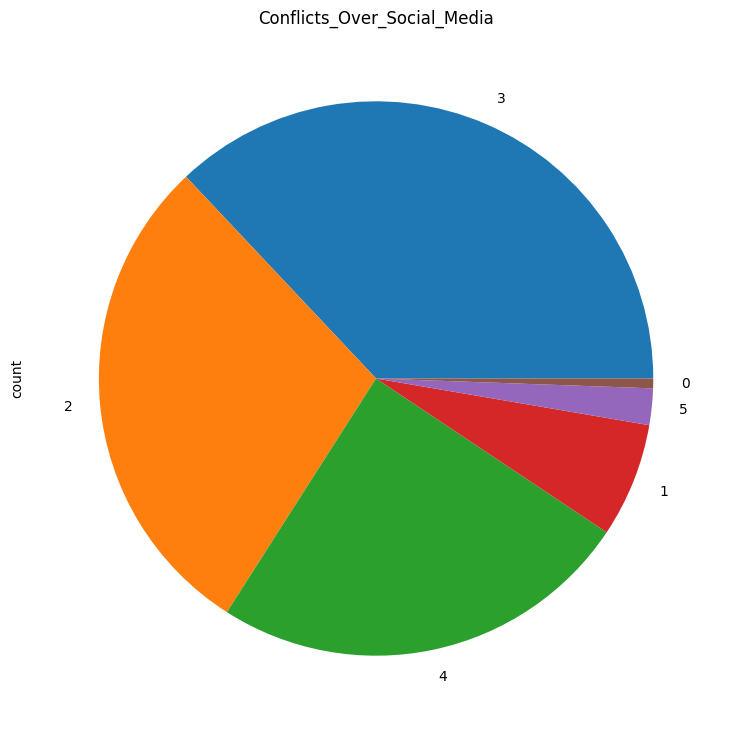

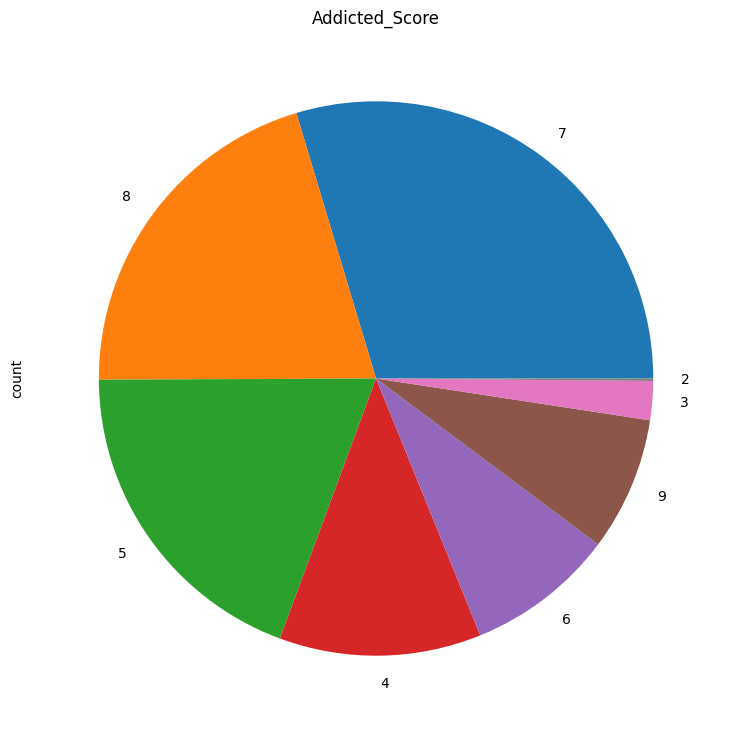

In [33]:
import matplotlib.pyplot as plt 
for column in columns:
    plt.figure(figsize=(9,9))
    df[column].value_counts().plot(kind='pie')
    plt.title(column)
    plt.spring()
plt.show()

In [34]:
df.columns

Index(['Age', 'Gender', 'Academic_Level', 'Country', 'Avg_Daily_Usage_Hours',
       'Most_Used_Platform', 'Affects_Academic_Performance',
       'Sleep_Hours_Per_Night', 'Mental_Health_Score', 'Relationship_Status',
       'Conflicts_Over_Social_Media', 'Addicted_Score'],
      dtype='object')

In [36]:
df["is_male"] = (df['Gender'] == 'Male').astype('int') 
df["is_female"] = (df['Gender'] == 'Female').astype('int')
df.drop(['Gender'],axis=1,inplace=True)

In [38]:
df.drop(['Country'],axis=1,inplace=True)

In [61]:
columns = df.drop(['Affects_Academic_Performance'],axis=1)
for column in columns:
    if df[column].dtypes == 'object':
        categories = df[column].unique()
        for category in categories:
            df[f'is_{category}'] = (df[column] == category).astype('int')
         

In [63]:
df.drop(['Academic_Level','Most_Used_Platform','Relationship_Status'],axis=1,inplace=True)

In [83]:
df['label'] = (df['Affects_Academic_Performance'] == 'Yes').astype('int')

In [85]:
df.drop(['Affects_Academic_Performance'],axis=1,inplace=True)

In [86]:
df

,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score,is_male,is_female,is_Undergraduate,is_Graduate,is_High School,...,is_KakaoTalk,is_VKontakte,is_WhatsApp,is_WeChat,is_In Relationship,is_Single,is_Complicated,under_20,after_20,label
0,5.2,6.5,6,3,8,0,1,1,0,0,...,0,0,0,0,1,0,0,1,0,1
1,2.1,7.5,8,0,3,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0
2,6.0,5.0,5,4,9,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,1
3,3.0,7.0,7,1,4,1,0,0,0,1,...,0,0,0,0,0,1,0,1,0,0
4,4.5,6.0,6,2,7,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
700,4.7,7.2,7,2,5,0,1,1,0,0,...,0,0,0,0,1,0,0,0,1,0
701,6.8,5.9,4,5,9,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,1
702,5.6,6.7,6,3,7,0,1,1,0,0,...,0,0,0,1,1,0,0,0,1,1
703,4.3,7.5,8,2,4,1,0,0,1,0,...,0,0,0,0,0,1,0,0,1,0


In [68]:
df['under_20'] = (df['Age'] < 20).astype('int')
df['after_20'] = (df['Age'] >= 20).astype('int')
df.drop(['Age'],axis=1,inplace=True)

In [87]:
X = df.drop(['label'],axis=1)
y = df['label']

In [88]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [90]:
from keras import Sequential as Sq 
from keras import layers 
model = Sq([
    layers.Dense(units=1,input_shape=(X_train.shape[1],),activation='sigmoid')
])

/Users/erdaulet/Desktop/allProjects/myenv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [91]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [92]:
model.fit(X_train,y_train,epochs=500,batch_size=32)

Epoch 1/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6065 - loss: 0.7247  
Epoch 2/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6472 - loss: 0.7033 
Epoch 3/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6830 - loss: 0.6554 
Epoch 4/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7270 - loss: 0.5734 
Epoch 5/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7231 - loss: 0.5752 
Epoch 6/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7530 - loss: 0.5172 
Epoch 7/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7515 - loss: 0.5120 
Epoch 8/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.7513 - loss: 0.4875
Epoch 9/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7654 - loss: 0.4673 
Epoch 10/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7882 - loss: 0.4535 
Epoch 11/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8259 - loss: 0.4129 
Epoch 12/500
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 971us/s

In [94]:
loss, acc = model.evaluate(X_test,y_test)
print(f"Test accuracy: {acc}\n Test loss: {loss}")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 1.0000 - loss: 0.0064 
Test accuracy: 1.0
 Test loss: 0.005498923826962709


In [95]:
weights,bias = model.layers[0].get_weights()

In [97]:
columns = df.drop('label',axis=1)

In [102]:
for feature,coef in zip(columns,weights):
    print(f"{feature}:{coef[0]}")

Avg_Daily_Usage_Hours:-0.21805347502231598
Sleep_Hours_Per_Night:-0.3923063278198242
Mental_Health_Score:-1.3704825639724731
Conflicts_Over_Social_Media:4.141190052032471
Addicted_Score:3.7247517108917236
is_male:-0.0899391695857048
is_female:0.028654661029577255
is_Undergraduate:-0.1593492180109024
is_Graduate:0.5583494305610657
is_High School:-1.045823574066162
is_Instagram:0.4189848303794861
is_Twitter:-0.15441323816776276
is_TikTok:0.5223484635353088
is_YouTube:-0.2686929702758789
is_Facebook:-0.2537239193916321
is_LinkedIn:-2.2662622928619385
is_Snapchat:-0.055043917149305344
is_LINE:-0.9787695407867432
is_KakaoTalk:0.49074026942253113
is_VKontakte:-0.9553993344306946
is_WhatsApp:-0.1609906256198883
is_WeChat:-0.05693167820572853
is_In Relationship:-0.3534806966781616
is_Single:0.21084539592266083
is_Complicated:-0.07716396450996399
under_20:-0.19142864644527435
after_20:-0.22638359665870667
